In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from scipy.cluster.hierarchy import linkage

In [3]:
df = pd.read_csv('114_congress.csv')

In [4]:
df.head(3)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [5]:
df.shape

(100, 18)

In [6]:
df.isnull().sum()

name     0
party    0
state    0
00001    0
00004    0
00005    0
00006    0
00007    0
00008    0
00009    0
00010    0
00020    0
00026    0
00032    0
00038    0
00039    0
00044    0
00047    0
dtype: int64

In [7]:
df.party.value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [9]:
from scipy.cluster.hierarchy import linkage

In [11]:
df2 = df.drop(['name', 'party', 'state'], axis=1)

In [12]:
hc_complete = linkage(df2, 'complete')
hc_ward = linkage(df2, 'ward')

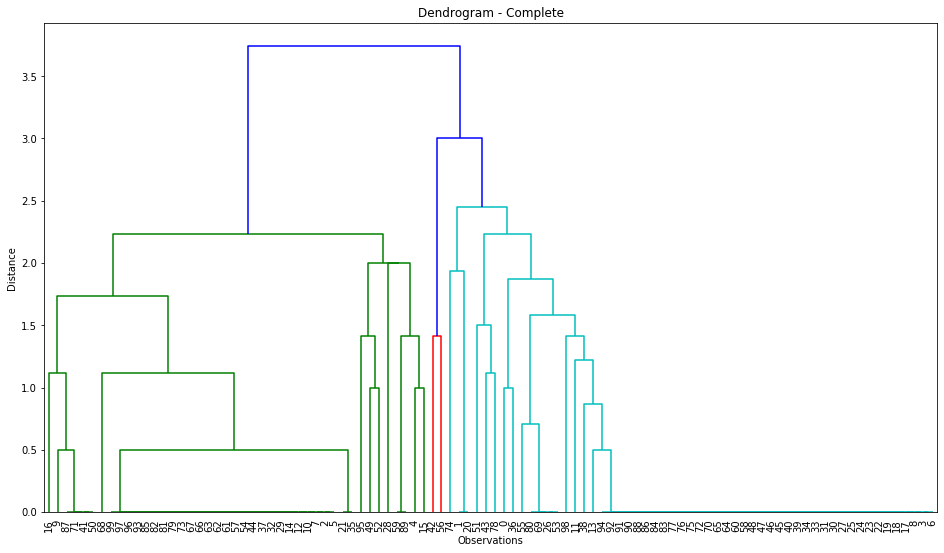

In [40]:
plt.figure(figsize = (16,9))
plt.title('Dendrogram - Complete')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size = 10);

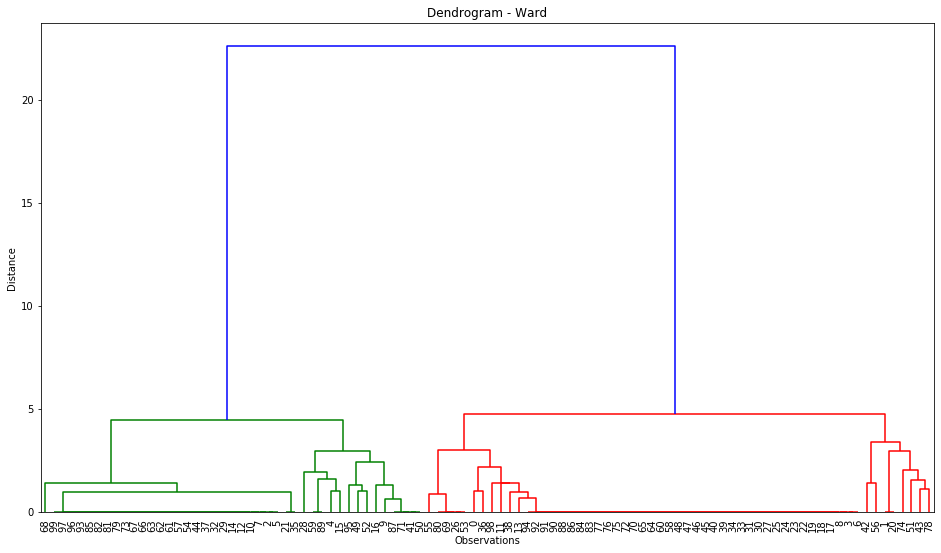

In [18]:
plt.figure(figsize = (16,9))
plt.title('Dendrogram - Ward')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size = 10);

In [ ]:
# 2 clusters ve complete icin

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete') # linkage default ward
cluster.fit_predict(df2)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

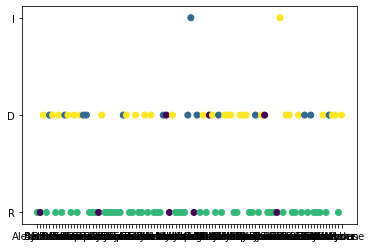

In [27]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster.labels_, cmap = 'viridis');

In [ ]:
# 4 clusters ve ward icin
#

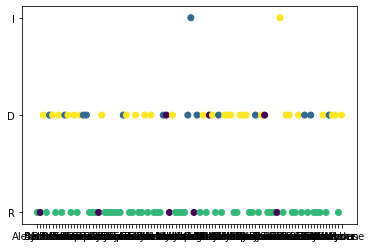

In [25]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward') # linkage default ward
cluster.fit_predict(df2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster.labels_, cmap = 'viridis');

In [28]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [38]:
print(f'Silhouette Score(n=2): {silhouette_score(df2, cluster.labels_)}')

Silhouette Score(n=2): 0.7510034517663473


In [35]:
print(f'Silhouette Score(n=4): {silhouette_score(df2, cluster.labels_)}')

Silhouette Score(n=4): 0.643584226084677
